# 最適化問題

In [1]:
from mip import *

## 1. 線形最適化問題

In [2]:
m = Model(sense=MAXIMIZE, solver_name=CBC)

In [3]:
x1 = m.add_var(name='x1')
x2 = m.add_var(name='x2')

In [4]:
m += (2 * x1 + x2 <= 60)
m += (x1 + 2 * x2 <= 60)

In [5]:
m.objective = maximize(15 * x1 + 18 * x2)

In [6]:
status = m.optimize(max_seconds=10)
status

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp1000I sum of infeasibilities 0 - average 0, 0 fixed columns
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 660
Clp0000I Optimal - objective value 660
Clp0000I Optimal - objective value 660
Clp0032I Optimal objective 660 - 0 iterations time 0.002, Idiot 0.00


<OptimizationStatus.OPTIMAL: 0>

In [7]:
if status == OptimizationStatus.OPTIMAL:
  print(f'optimal cost {m.objective_value}')
  for v in m.vars:
    print(f'{v.name} {v.x}')
elif status == OptimizationStatus.FEASIBLE:
  print(f'feasible cost {m.objective_value}, best possible {m.objective_bound}')
  for v in m.vars:
    print(f'{v.name} {v.x}')
elif status == OptimizationStatus.NO_SOLUTION_FOUND:
  print('no feasible')
else:
  print('unknown')


optimal cost 660.0
x1 20.0
x2 20.0


## 2. 錐最適化問題

In [8]:
import scipy
import scs
import numpy as np
import cvxpy as cp

(CVXPY) Nov 12 11:05:49 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Nov 12 11:05:49 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [9]:
# Set up the problem data
P = scipy.sparse.csc_matrix([
  [0., 0., 0.],
  [0., 0., 0.],
  [0., 0., 0.]])
c = np.array([-1., -2., -2.]) # minimize
A = scipy.sparse.csc_matrix(
  [[-1. , 0., 0.],
   [0. , -1., 0.],
   [0. , 0., -1.],
   [4. , 2., 3.],
   [-1. , 1., 1.],
  ])
b = np.array([0., 0., 0., 10., 0.])

# Populate dicts with data to pass into SCS
data = dict(P=P, A=A, b=b, c=c)
cone = dict(l=4, q=[1], )

# Initialize solver
solver = scs.SCS(data, cone, eps_abs=1e-9, eps_rel=1e-9, verbose=True)
# Solve!
sol = solver.solve()

print(f"SCS took {sol['info']['iter']} iters")
print(f"Objective :{-sol['info']['pobj']}")
print("Optimal solution vector x*:")
print(sol["x"])

print("Optimal dual vector y*:")
print(sol["y"])

------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 3, constraints m: 5
cones: 	  l: linear vars: 4
	  q: soc vars: 1, qsize: 1
settings: eps_abs: 1.0e-09, eps_rel: 1.0e-09, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 9, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 4.24e+01  8.34e-01  3.21e+01 -2.10e+01  1.00e-01  2.69e-03 
   125| 1.37e-10  1.14e-11  1.06e-12 -5.00e+00  1.00e-01  4.06e-03 
----------------------------------------------------

In [12]:
n = 3

xs = cp.Variable(n)
x, y, z = xs
constraints = []
constraints += 2 * x + 3 * y + 4 * z <= 10,
constraints += 2 * x,
constraints += 2 * x + 3 * y + 4 * z <= 10,


m = Model(sense=MAXIMIZE, solver_name=CBC)
x = m.add_var(name='x')
y = m.add_var(name='y')
z = m.add_var(name='z')

m += 2*x + 3*y + 4*z <= 10
m.objective = maximize(2*x + 2*y + z)
status = m.optimize(max_seconds=10)

if status == OptimizationStatus.OPTIMAL:
  print(f'optimal cost {m.objective_value}')
  for v in m.vars:
    print(f'{v.name} {v.x}')

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 0 (-1) rows, 0 (-3) columns and 0 (-3) elements
Clp0000I Optimal - objective value 10
Coin0511I After Postsolve, objective 10, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 10 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00
optimal cost 10.0
x 5.0
y 0.0
z 0.0


## 3. 整数最適化問題

In [ ]:
m = Model(sense=MINIMIZE, solver_name=CBC)
x = m.add_var(name='x', var_type=INTEGER, lb=0)
y = m.add_var(name='y', var_type=INTEGER, lb=0)
z = m.add_var(name='z', var_type=INTEGER, lb=0)

m += x + y + z == 32
m += 2*x + 4*y + 8*z == 80
m.objective = minimize(y + z)
status = m.optimize(max_seconds=10)

if status == OptimizationStatus.OPTIMAL:
  print(f'optimal cost {m.objective_value}')
  for v in m.vars:
    print(f'{v.name} {v.x}')

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 2 (0) rows, 3 (0) columns and 6 (0) elements
Clp1000I sum of infeasibilities 2.62338e-07 - average 1.31169e-07, 0 fixed columns
Coin0506I Presolve 2 (0) rows, 3 (0) columns and 6 (0) elements
Clp0006I 0  Obj 2.6666875 Dual inf 200 (2)
Clp0029I End of values pass after 3 iterations
Clp0000I Optimal - objective value 2.6666667
Clp0000I Optimal - objective value 2.6666667
Clp0000I Optimal - objective value 2.6666667
Clp0032I Optimal objective 2.666666667 - 0 iterations time 0.002, Idiot 0.00

Starting MIP optimization
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 4 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 2 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 2 rows, 3 columns (3 integer (0 of which binary)) and 6 elements
Coin3009W Conflict graph built in 0.001 seconds, density

## 4. ロバスト最適化

## 5. 栄養問題

In [ ]:
# 実行不能な例

m = Model(sense=MAXIMIZE, solver_name=CBC)
x1 = m.add_var(name='x1', var_type=CONTINUOUS, lb=0)
x2 = m.add_var(name='x2', var_type=CONTINUOUS, lb=0)

m += x1 - x2 <= -1
m += -x1 + x2 <= -1

# dual
# minimize -(y1 + y2)
# s.t.     y1 - y2 >= 1
#          -y1 + y2 >= 1

m.objective = maximize(x1+x2)
status = m.optimize(max_seconds=10)
display(status)

m.lp_method = LP_Method.DUAL
status = m.optimize(max_seconds=10)
display(status)


Starting solution of the Linear programming problem using Primal Simplex

Coin0509I Presolve thinks problem is infeasible AND unbounded???
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 1922.572 Primal inf 1.999998 (2) Dual inf 200 (2)
Clp0029I End of values pass after 1 iterations
Clp0001I Primal infeasible - objective value 6.25e+11
Clp0032I PrimalInfeasible objective 6.25e+11 - 2 iterations time 0.002, Idiot 0.00


<OptimizationStatus.INFEASIBLE: 1>

Starting solution of the Linear programming problem using Dual Simplex

Clp0006I 0  Obj 6.25e+11 Primal inf 1.999999 (1) Dual inf 200 (1)
Clp0029I End of values pass after 0 iterations
Clp0029I End of values pass after 0 iterations
Clp0001I Primal infeasible - objective value 6.25e+13


<OptimizationStatus.INFEASIBLE: 1>

In [ ]:
# 非有界な例

m = Model(sense=MAXIMIZE, solver_name=CBC)
x1 = m.add_var(name='x1', var_type=CONTINUOUS, lb=0)
x2 = m.add_var(name='x2', var_type=CONTINUOUS, lb=0)

# maximize x1 + x2
m += x1 - x2 >= -1 # y1
m += -x1 + x2 >= -1 # y2

# minimize -(y1 + y2)
# s.t.   y1 + -y2 <= 1 <-> -y1 + y2 >= 1
#        -y1 + y2 <= 1

m.objective = maximize(x1+x2)
status = m.optimize(max_seconds=10)
display(status)

# 嘘｡双対問題は解いていない
m.lp_method = LP_Method.DUAL
status = m.optimize(max_seconds=10)
display(status)


Starting solution of the Linear programming problem using Primal Simplex

Coin0509I Presolve thinks problem is infeasible AND unbounded???
Clp3003W Analysis indicates model infeasible or unbounded
Clp1000I sum of infeasibilities 0 - average 0, 0 fixed columns
Coin0508I Presolve thinks problem is unbounded
Clp0006I 0  Obj 1311.7759 Dual inf 200 (2)
Clp0029I End of values pass after 1 iterations
Clp0029I End of values pass after 1 iterations
Clp0029I End of values pass after 1 iterations
Clp0029I End of values pass after 1 iterations
Clp0000I Optimal - objective value 1312.7
Clp0029I End of values pass after 0 iterations
Clp0029I End of values pass after 0 iterations
Clp0029I End of values pass after 0 iterations
Clp0029I End of values pass after 0 iterations
Clp0029I End of values pass after 0 iterations
Clp0000I Optimal - objective value 1312.7
Clp0029I End of values pass after 0 iterations
Clp0029I End of values pass after 0 iterations
Clp0029I End of values pass after 0 iterations
Cl

<OptimizationStatus.OPTIMAL: 0>

Clp0006I 0  Obj 1 Dual inf 1.999999 (1)
Clp0002I Dual infeasible - objective value 2e+10


<OptimizationStatus.UNBOUNDED: 2>

In [ ]:
# https://scmopt.github.io/manual/15mypulp.html#multidict%E9%96%A2%E6%95%B0

def multidict(d: dict):
  ret = [list(d.keys())]
  for k, arr in d.items():
    if type(arr) is not list:
      arr = [arr]
    append_num = (1 + len(arr)) - len(ret)
    if append_num > 0:
      ret += [{} for _ in range(append_num)]

    for i, val in enumerate(arr):
      ret[i+1][k] = val

  return ret

I,d = multidict({1:80, 2:270, 3:250 , 4:160, 5:180})
J,M,N = multidict({1:[500,600], 2:[800,500], 3:[500,100]})
print(I,d)
print(J,M,N)

[1, 2, 3, 4, 5] {1: 80, 2: 270, 3: 250, 4: 160, 5: 180}
[1, 2, 3] {1: 500, 2: 800, 3: 500} {1: 600, 2: 500, 3: 100}


In [ ]:
F, c, n = multidict(
    {
        "CQPounder": [
            360,
            {
                "Cal": 556,
                "Carbo": 39,
                "Protein": 30,
                "VitA": 147,
                "VitC": 10,
                "Calc": 221,
                "Iron": 2.4,
            },
        ],
        "Big M": [
            320,
            {
                "Cal": 556,
                "Carbo": 46,
                "Protein": 26,
                "VitA": 97,
                "VitC": 9,
                "Calc": 142,
                "Iron": 2.4,
            },
        ],
        "FFilet": [
            270,
            {
                "Cal": 356,
                "Carbo": 42,
                "Protein": 14,
                "VitA": 28,
                "VitC": 1,
                "Calc": 76,
                "Iron": 0.7,
            },
        ],
        "Chicken": [
            290,
            {
                "Cal": 431,
                "Carbo": 45,
                "Protein": 20,
                "VitA": 9,
                "VitC": 2,
                "Calc": 37,
                "Iron": 0.9,
            },
        ],
        "Fries": [
            190,
            {
                "Cal": 249,
                "Carbo": 30,
                "Protein": 3,
                "VitA": 0,
                "VitC": 5,
                "Calc": 7,
                "Iron": 0.6,
            },
        ],
        "Milk": [
            170,
            {
                "Cal": 138,
                "Carbo": 10,
                "Protein": 7,
                "VitA": 80,
                "VitC": 2,
                "Calc": 227,
                "Iron": 0,
            },
        ],
        "VegJuice": [
            100,
            {
                "Cal": 69,
                "Carbo": 17,
                "Protein": 1,
                "VitA": 750,
                "VitC": 2,
                "Calc": 18,
                "Iron": 0,
            },
        ],
    }
)
N, a, b = multidict(
    {
        "Cal": [2000, 3000],
        "Carbo": [300, 375],
        "Protein": [50, 60],
        "VitA": [500, 750],
        "VitC": [85, 100],
        "Calc": [660, 900],
        "Iron": [6.0, 7.5],
    }
)

In [ ]:
c['CQPounder']

360

In [ ]:
model = Model(sense=MINIMIZE, solver_name=CBC)
x, s, d = {}, {}, {}
for j in F:
  x[j] = model.add_var(name=f'x{j}', var_type=CONTINUOUS, lb=0)
  for i in N:
    s[i] = model.add_var(name=f'surplus{i}', var_type=CONTINUOUS, lb=0)
    d[i] = model.add_var(name=f'deficit{i}', var_type=CONTINUOUS, lb=0)

for i in N:
  model += xsum(n[j][i] * x[j] for j in F) >= a[i] - d[i]
  model += xsum(n[j][i] * x[j] for j in F) <= b[i] - s[i]
model.objective = minimize(xsum(c[j] * x[j] for j in F) + xsum(9999 * d[i] + 9999 * s[i] for i in N))
status = model.optimize(max_seconds=10)
display(status)

if status == OptimizationStatus.OPTIMAL:
  print(f'optimal cost {model.objective_value}')
  for j in F:
    if x[j].x > 0.:
      print(x[j].name, x[j].x)

  for i in N:
      if d[i].x > 0:
          print(f"deficit of {i} ={d[i].x}")
      if s[i].x > 0:
          print("surplus of {i} ={s[i].x}")

Starting solution of the Linear programming problem using Dual Simplex

Clp0024I Matrix will be packed to eliminate 6 small elements
Coin0506I Presolve 14 (0) rows, 14 (-91) columns and 99 (-7) elements
Clp0006I 0  Obj 0 Primal inf 26.359677 (7)
Clp0000I Optimal - objective value 265119.19
Coin0511I After Postsolve, objective 265119.19, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 265119.1876 - 6 iterations time 0.002, Presolve 0.00


<OptimizationStatus.OPTIMAL: 0>

optimal cost 265119.18759267527
xCQPounder 0.013155307054176111
xFries 10.42266450006435
xMilk 2.5154631133990755
xVegJuice 0.7291054943881469
deficit of VitC =26.265987213562042


## 6. 混合問題

In [ ]:
import cvxpy as cp
import numpy as np

def prodmix(I, K, a, p, epsilon, LB):
    """prodmix:  robust production planning using soco
    Parameters:
        I - set of materials
        K - set of components
        a[i][k] -  coef. matrix
        p[i] - price of material i
        LB[k] - amount needed for k
    Returns a model, ready to be solved.
    """

    xs = cp.Variable(len(I))
    rhss = cp.Variable(len(K))
    x, rhs = {}, {}
    for idx,i in enumerate(I):
        x[i] = xs[idx]
    for idx,k in enumerate(K):
        rhs[k] = rhss[idx]

    constraints = []
    constraints += (cp.sum(list(x.values())) == 1),

    for k in K:
        constraints += (rhs[k] == -LB[k] + cp.sum([a[i, k] * x[i] for i in I])),
        constraints += cp.SOC(rhs[k], epsilon * xs),
    for i in I:
        constraints += (x[i] >= 0),

    objective = cp.sum([p[i] * x[i] for i in I])
    model = cp.Problem(cp.Minimize(objective), constraints)
    return model


def make_data():
    a = {
        (1, 1): 0.25,
        (1, 2): 0.15,
        (1, 3): 0.2,
        (2, 1): 0.3,
        (2, 2): 0.3,
        (2, 3): 0.1,
        (3, 1): 0.15,
        (3, 2): 0.65,
        (3, 3): 0.05,
        (4, 1): 0.1,
        (4, 2): 0.05,
        (4, 3): 0.8,
    }
    epsilon = 0.01
    I, p = multidict({1: 5, 2: 6, 3: 8, 4: 20})
    K, LB = multidict({1: 0.2, 2: 0.3, 3: 0.2})
    return I, K, a, p, epsilon, LB


obj: 7.131578924156379
obj: 7.478950128785509
obj: 7.8627881093394425
obj: 8.229077702597367
obj: 8.792029443940345


<Axes: xlabel='epsilon', ylabel='objective'>

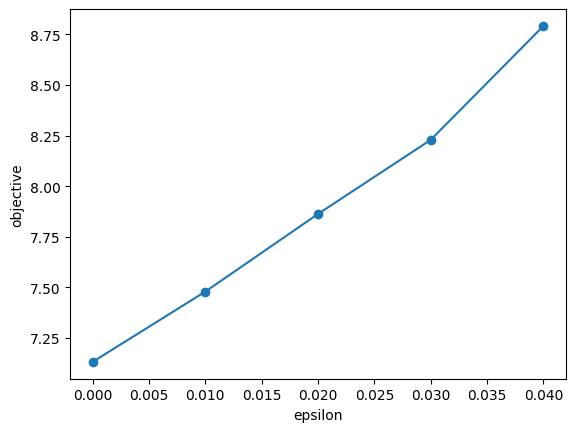

In [ ]:
I, K, a, p, epsilon, LB = make_data()
epsilons = []
obj_list = []
for i in range(5):
    epsilon = i * 0.01
    model = prodmix(I, K, a, p, epsilon, LB)
    model.solve(verbose=False)
    print("obj:", model.value)
    epsilons.append(epsilon)
    obj_list.append(model.value)


import pandas as pd
# df = pd.Series(data=obj_list)
# df.plot(xlabel='epsilon', ylabel='objective', marker='o')

df = pd.Series(data=obj_list, index=epsilons)
df.plot(xlabel='epsilon', ylabel='objective', marker='o')